# Inaugural Project

**In this project we solve a simple economic model where we consider households with a male and female member and seek to maximize utility.**

Imports and set magics:

In [6]:
#Import used packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
hsm = inauguralproject.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the household model, we start by defining the values given to alpha and sigma. Next we create a loop in a loop that maximize the utility of the choices given to the household, for the values of alpha and sigma. 

In the loop we used the solve_descrete model given from the assignment text, and calculated the different values for HF and HM. 

Finally we plottet HF/HM for the different values of alpha and sigma.

In [7]:
# Defining values of alpha and sigma
alpha_vec = np.array([0.25, 0.5, 0.75])
sigma_vec = np.array([0.5, 1., 1.5])

#Creating an empty list for the loop
Female_Male = []

#Looping over different values of alpha and sigma, and caluclating the ratio of HF and HM
for i in alpha_vec:
    for j in sigma_vec:
        hsm.par.alpha = i
        hsm.par.sigma = j

        Q1sol = hsm.solve_discrete()

        print(f'HF/HM: {Q1sol.HF/Q1sol.HM:.2f} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

        Female_Male.append(Q1sol.HF/Q1sol.HM)

Female_Male

HF/HM: 0.55 for alpha and sigma: (0.25, 0.5)
HF/HM: 0.31 for alpha and sigma: (0.25, 1.0)
HF/HM: 0.21 for alpha and sigma: (0.25, 1.5)
HF/HM: 1.00 for alpha and sigma: (0.5, 0.5)
HF/HM: 1.00 for alpha and sigma: (0.5, 1.0)
HF/HM: 1.00 for alpha and sigma: (0.5, 1.5)
HF/HM: 1.83 for alpha and sigma: (0.75, 0.5)
HF/HM: 3.25 for alpha and sigma: (0.75, 1.0)
HF/HM: 4.67 for alpha and sigma: (0.75, 1.5)


[0.5454545454545454,
 0.3076923076923077,
 0.21428571428571427,
 1.0,
 1.0,
 1.0,
 1.8333333333333333,
 3.25,
 4.666666666666667]

In [3]:
#Creating an empty list for the loop
x_values = []

#Looping over the alpha and sigma vectors to create names for the bar plot
for i in alpha_vec:
    for j in sigma_vec:
        x_values.append('\u03B1=' + str(i)+ ','+ '\u03C3=' + str(j))
    
x_values

['α=0.25,σ=0.5',
 'α=0.25,σ=1.0',
 'α=0.25,σ=1.5',
 'α=0.5,σ=0.5',
 'α=0.5,σ=1.0',
 'α=0.5,σ=1.5',
 'α=0.75,σ=0.5',
 'α=0.75,σ=1.0',
 'α=0.75,σ=1.5']

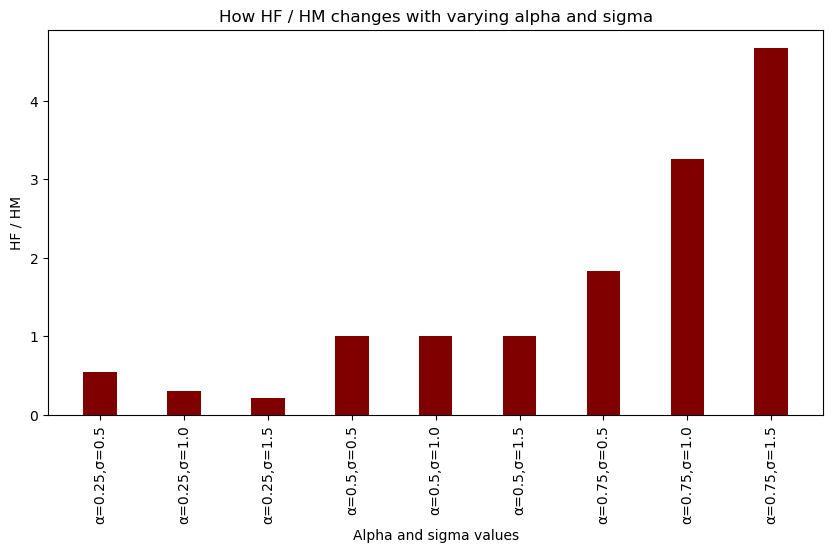

In [4]:
# Starting the figure
barplot = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(x_values, Female_Male, color ='maroon',
        width = 0.4)

plt.xticks(rotation=90)
plt.xlabel("Alpha and sigma values")
plt.ylabel("HF / HM")
plt.title("How HF / HM changes with varying alpha and sigma")
plt.show()

We find that alpha represends the productivity of females in the households rative to males, and sigma represends the substitution effect. When alpha is equal to 0.5 the houshold labor between the two sexes are equal to eachother as they are equally good at homework. 

However when men are more productive at homeproduction meaning that alpha < 0.5, they will work more in the home than females, and the other way around for alpha > 0.5.

# Question 2

We illustrate the logarithmic functions against eachother. To do this we use the descrete model by using the code given for the assignment as in question 1. 

In [5]:
# Array of values that wF can take
wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# Creating two empty lists for the loop
log_HF_HM = []
log_wF_wM = []

# Defining the standard values of alpha and sigma
hsm.par.alpha = 0.5
hsm.par.sigma = 1

# Looping over the array of values that wF can take
for i in wF_vec:
    hsm.par.wF = i

    # Solving for each value of wF
    Q2sol = hsm.solve_discrete()

    # Appending the solution to the lists
    log_HF_HM.append(math.log(Q2sol.HF/Q2sol.HM))

    log_wF_wM.append(math.log(hsm.par.wF/hsm.par.wM))


print(log_HF_HM)
print(log_wF_wM)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


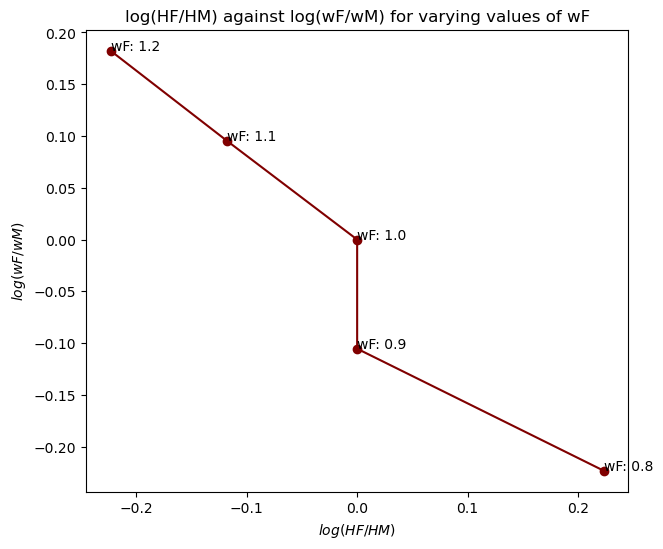

In [6]:
#Illustrating the model
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM,log_wF_wM, color ='maroon')
ax.scatter(log_HF_HM,log_wF_wM, color ='maroon')
ax.set_title('log(HF/HM) against log(wF/wM) for varying values of wF')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM[i], log_wF_wM[i]))

This shows us that when the female wage is relatively higher than the male wage, the females work less in the home. And the other way round when the male wage is relatively higher. 

# Question 3

We now assume that the choice set is continuous. We do this by calculating the values and plotting the relationship between the logarithm of the relative hours worked at home (HF/HM) and the logarithm of the relative wage (wF/wM) for different values of wF. For each wF value we solve for the relative hours worked at home and relative wage using the solve_cont() method.

After this we make a plot, showing the logarithm of HF/HM on the x-axis and the logarithm of wF/wM on the y-axis. This provides a visual representation of the relationship between the relative hours worked at home and the relative wage for different values of wF.




In [7]:
#Create empty list to store results
log_HF_HM3 = []
log_wF_wM3 = []

#Create loop to solve for varying wF
for i in hsm.par.wF_vec:
    hsm.par.wF = i
    Q3sol = hsm.solve_cont()
    log_HF_HM3.append(math.log(Q3sol.HF/Q3sol.HM))
    log_wF_wM3.append(math.log(hsm.par.wF/hsm.par.wM))
    


c:\Users\emok\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method nelder-mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


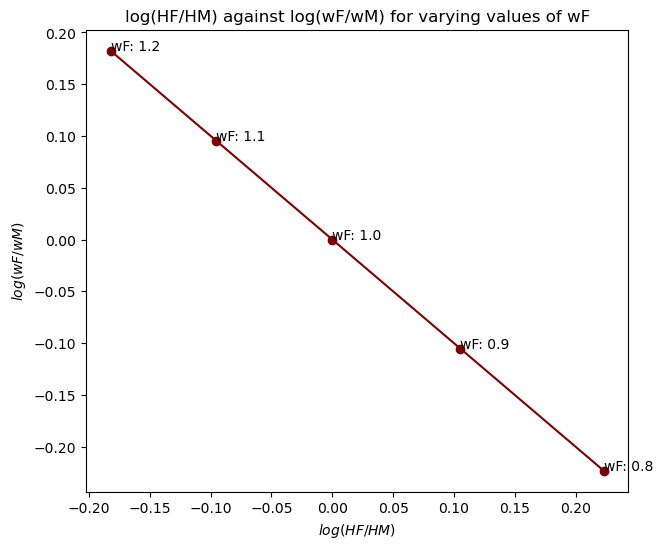

In [8]:
#Plot
#Illustrating the model
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM3,log_wF_wM3, color ='maroon')
ax.scatter(log_HF_HM3,log_wF_wM3, color ='maroon')
ax.set_title('log(HF/HM) against log(wF/wM) for varying values of wF')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM3[i], log_wF_wM3[i]))



When the female wage increases, the individual tends to work more and allocate less time to work at home. This relationship implies that there is no abrupt change or kink in the pattern of behavior. Instead, the increase in the female wage leads to a smooth and continuous adjustment in the allocation of time between market work and home work.

# Question 4

In order to align the model with the regression estimates presented in Siminski and Yetsenga's study, "Specialization, Comparative Advantage, and the Sexual Division of Labor," we set the values of alpha ($\alpha$) and sigma ($\sigma$) as follows: $\alpha$ = 0.99 and $\sigma$ = 0.09. These parameter values imply that females exhibit significantly higher productivity in home work compared to men.

In [9]:
# Define objective function

def obj_f(x):

    hsm.par.alpha= x[0]
    hsm.par.sigma= x[1]

    hsm.solve_wF_vec()
    hsm.run_regression()
    
    return (hsm.par.beta0_target - hsm.sol.beta0)**2 + (hsm.par.beta1_target- hsm.sol.beta1)**2


In [12]:
bounds =  [(0.1,0.99), (0.02, 0.30)]
x0=[0.5,0]

res = optimize.minimize(obj_f, x0, method='Nelder-Mead', bounds=bounds)

print(f'alpha = {res.x[0]:.2f}\nsigma = {res.x[1]:.2f}')


C:\Users\emok\AppData\Local\Temp\ipykernel_26276\1978457223.py:4: OptimizeWarning: Initial guess is not within the specified bounds
  res = optimize.minimize(obj_f, x0, method='Nelder-Mead', bounds=bounds)


alpha = 0.99
sigma = 0.09


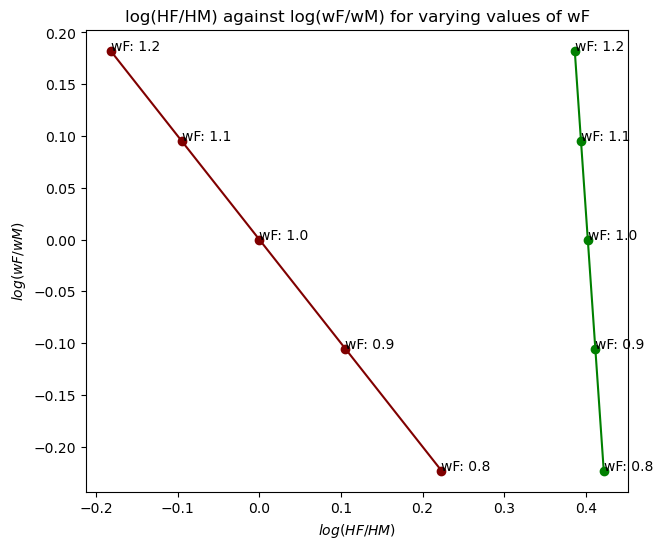

In [11]:
chosen_alpha = 0.99
chosen_sigma = 0.09

hsm.par.alpha = chosen_alpha
hsm.par.sigma = chosen_sigma

log_HF_HM4 = np.log(hsm.sol.HF_vec/hsm.sol.HM_vec)

#Plot
#Illustrating the model
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM4,log_wF_wM3, color ='green')
ax.plot(log_HF_HM3,log_wF_wM3, color ='maroon')
ax.scatter(log_HF_HM4,log_wF_wM3, color ='green')
ax.scatter(log_HF_HM3,log_wF_wM3, color ='maroon')
ax.set_title('log(HF/HM) against log(wF/wM) for varying values of wF')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM3[i], log_wF_wM3[i]))
    plt.annotate(label, (log_HF_HM4[i], log_wF_wM3[i]))



$\frac{\alpha}{(1-\alpha)}$ is the productivity in the home for females in relation to males. Hence, a high value for alpha indicates that females are more productive at home compared to their male counterparts. In addition, the low value of sigma tells that there exists a low elasticity of substitution between work at home for the two genders.